In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.optimize as opt
import csv

from scipy.linalg import expm
from scipy.optimize import minimize

import matplotlib
matplotlib.rcParams['figure.dpi'] = 50

In [3]:
#Set phase guess and pulse time for Pupillo gate
 # in Omega*t dimension-less units
resolution = 200 # number of phase steps in the pulse
# PhaseGuess = [(-0.5*np.sin(2*np.pi*x/pulse_time)-0.5) for x in np.linspace(0,pulse_time,resolution)] #input a phase profile guess 
Omega_Rabi1=2*np.pi*2 #MHz
Omega_Rabi2=2*np.pi*2 #MHz
pulse_time=6.7
Blockade = 20 #2*np.pi*100  #MHz
R_lifetime = 12000000 # microseconds
Delta1=0
Delta2=2 #MHz 

delta1=0
delta1=0
 
phi_offset1=-0.7318
phi_offset2=-2.44
phi_offset3=-5.15
phi_offset4=-.5


#Mark's Parms

Amp1=2*np.pi*0.1122
Amp2=0.1
Amp3=0.01
Amp4=0.01


f1=1.043*Omega_Rabi1
f2=1.043*Omega_Rabi1*2
f3=1.043*Omega_Rabi1*4
f4=1.043*Omega_Rabi1*8

inputs=[pulse_time,delta1,Amp1,f1,phi_offset1]



inputs=[pulse_time,delta1,Amp1,f1,phi_offset1,Amp2,phi_offset2,f2,Amp3,phi_offset3,f3,phi_offset4,f4,Amp4]


In [ ]:
#ADD FINITE RYDBERG BLOCKADE STRENGTH
def pulse_gate_infidelity_opt_two_level(inputs):
    def loss_function(inputs):
        #Define inputs
        pulse_time_f=inputs[0]
#         pulse_time_f=pulse_time#inputs[0]
        Delta_f1=inputs[1]
        Omega_Rabi_f1=Omega_Rabi1
        Amp_f1=inputs[2]
        f1_f1=inputs[3]
        phi_offset_f1=inputs[4]
        Omega_Rabi_f2=Omega_Rabi2
        Amp_f2=inputs[5]
        f1_f2=inputs[7]
        phi_offset_f2=inputs[6]
        Amp_f3=inputs[8]
        phi_offset_f3=inputs[9]
        f1_f3=inputs[10]
        phi_offset_f4=inputs[11]
        f1_f4=inputs[12]
        Amp_f4=inputs[13]
        #define phase profile as a function of time based on inputs
        #phase profile with 2 Cosine terms
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess
        # phase profile with 1 cosine term for testing
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)+Amp_f3*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**3+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**3 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)+Amp_f3*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3)+Amp_f4*np.cos((t-pulse_time_f/2)*((f1_f4)/Omega_Rabi_f1)-phi_offset_f4) for t in np.linspace(0,pulse_time_f,resolution)]
        phases = PhaseGuess
        times=np.linspace(0,pulse_time_f,resolution+1) # Time in dimensionless units omega_rabi*t
        #Blockade = inputs[7] #Rydberg blockade strength in MHz

        
        DecayRate=(1/R_lifetime)/(Omega_Rabi1) # Decay rate normalized with Rabi frequency
        B = Blockade/Omega_Rabi1 # normalize the blockade with the Rabi frequency
        psi01 = np.array([1,0,0], complex)  # single atom state ground and Rydberg
        psi11 = np.array([1,0,0,0,0,0,0], complex) # two atom state ground-ground, ground-Rydberg, Rydberg-Rydberg
        for i in range(resolution):  #loop over small time increments and apply small unitary rotations at each step
            dt = times[i+1]-times[i]  #time increment difference
            Omega1 = 1*np.exp(1j*phases[i])  #set up the complex Rabi frequency for m=-1/2
            Omega2 = (Omega_Rabi2/Omega_Rabi1)*Omega1  #set up the complex Rabi frequency for m=+1/2
            H01 = 0.5*np.array([[0, Omega1, Omega2], [np.conj(Omega1), Delta1, 0], [np.conj(Omega2), 0, Delta2]]) #Hamiltonian for one atom
            if B is None:
                H11 = np.sqrt(2)*H01
            else:
                H11 = np.sqrt(2)*0.5*np.array([[0,                Omega1,           Omega2,           0,                0,                0,                0], 
                                               [np.conj(Omega1),  Delta1,           0,                Omega1,           Omega2,           0,                0], 
                                               [np.conj(Omega2),  0,                Delta2,           0,                0,           Omega1,           Omega2], 
                                               [0,                np.conj(Omega1),  0,                2*Delta1+B,       0,                0,                0], 
                                               [0,                np.conj(Omega2),  0,                0,                Delta1+Delta2+B,  0,                0], 
                                               [0,                0,                np.conj(Omega1),  0,                0,                Delta1+Delta2+B,  0], 
                                               [0,                0,                np.conj(Omega2),  0,                0,                0,                2*Delta2+B]]) # Hamiltonian for two atoms
            psi01 = scipy.linalg.expm(-1j*H01*dt)@psi01  #evolve input 1 atom state in time
            psi11 = scipy.linalg.expm(-1j*H11*dt)@psi11  #evolve 2 atom state
        # extract phases and populations to calculate the fidelity
        phase = psi01[0]/np.abs(psi01[0]) # Calculate the phase shift induced on the ground state for 1 atom
        psi01/=phase  # divide 1 atom state by phase shift
        psi11/=phase**2 #divide 2 atom state by 1 atom phase shift on each atom
        # Bell state fidelity based on ground state populations for the 1 atom and 2 atom case.
        # The relative phase shifts between the two psi01[0] and psi11[0] are also accounted for in this calculation
        # For perfect fidelity, there will be a pi phase shift between the two t
        F_bell = 1/16*np.abs(1+2*psi01[0]-psi11[0])**2
        F_av = 16/20*F_bell + 1/20*(1+2*np.abs(psi01[0])**2+np.abs(psi11[0])**2)
        return (1-F_bell)
    def callback(inputs):
        infid = loss_function(inputs)
        print("Infidelity: {}".format(infid), end = '\r', flush=True)
    inF_bell = scipy.optimize.minimize(loss_function,
                                      inputs,
                                      callback=callback,
                                      options = {'gtol': 1e-6})
    return inF_bell.fun, inF_bell.x

In [7]:
infid, parms=pulse_gate_infidelity_opt_two_level(inputs)

In [10]:
pulse_time_f=parms[0]
Delta_f1=parms[1]
Omega_Rabi_f1=Omega_Rabi1
Amp_f1=parms[2]
f1_f1=parms[3]
phi_offset_f1=parms[4]
# Omega_Rabi_f2=Omega_Rabi2
Amp_f2=parms[5]
f1_f2=parms[7]
phi_offset_f2=parms[6]
# Amp_f3=parms[7]
# f1_f3=parms[8]
# phi_offset_f3=parms[9]

phases=[((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess

Text(0.95, 0.95, 'Blockade Strength = 20 \n\n Infidelity: 0.00671')

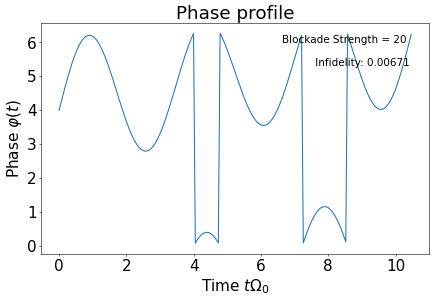

In [13]:
font = {'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

times_list = []
interpolation = []

for i in range(resolution):
    times_list.append(np.linspace(0,parms[0],resolution + 1)[i])

# fig, ax = plt.plot(figsize = (8,8))
plt.figure(figsize=(10,6))
plt.plot(times_list, (np.array(phases)-2.2)%(2*np.pi))
plt.title("Phase profile")
plt.ylabel("Phase $\\varphi(t)$")
plt.xlabel("Time $t\Omega_0$")
plt.text(.95, 0.95, "Blockade Strength = 20 \n\n Infidelity: {:.5f}".format(infid), transform=plt.gca().transAxes,
         fontsize=15, verticalalignment='top', horizontalalignment='right')


GRAPE starts here

In [16]:
# --- load CRAB best profile from previous run ---
times_crab = times_list                   # whatever your CRAB grid was
phi_crab  = phases            # the array of length times_list

# --- interpolate onto the GRAPE grid ---
N=1000 # number of points in the GRAPE pulse
t_grape = np.linspace(0, pulse_time, N)
u = np.interp(t_grape, times_crab, phi_crab)

# --- Parameters ---
T_total = pulse_time
dt = T_total / N
B=Blockade/Omega_Rabi1 # normalize the blockade with the Rabi frequency


In [ ]:
# Initial states for one- and two-atom branches
psi01_init = np.array([1, 0, 0], complex)       # |g> -> single atom
psi11_init = np.array([1, 0, 0, 0, 0, 0, 0], complex)  # |gg> -> two atoms

# Full two-atom Hamiltonian with phase control
def H11_control(phi_j):
    Omega1 = Omega_Rabi1 * np.exp(1j * phi_j)
    Omega2 = Omega_Rabi2 * np.exp(1j * phi_j)
    H = 0.5 * np.sqrt(2) * np.array([
        [0,               Omega1,          Omega2,        0,                     0,                     0,                     0],
        [np.conj(Omega1), Delta1,          0,             Omega1,               Omega2,               0,                     0],
        [np.conj(Omega2), 0,               Delta2,        0,                     0,               Omega1,               Omega2],
        [0,               np.conj(Omega1), 0,             2*Delta1 + B,    0,                     0,                     0],
        [0,               np.conj(Omega2), 0,             0,                     Delta1+Delta2+B,0,                     0],
        [0,               0,               np.conj(Omega1),0,                    0,                     Delta1+Delta2+B,0],
        [0,               0,               np.conj(Omega2),0,                    0,                     0,                     2*Delta2 + B]
    ], complex)
    return H

# Single-atom Hamiltonian with phase control
def H01_control(phi_j):
    Omega1 = Omega_Rabi1 * np.exp(1j * phi_j)
    Omega2 = Omega_Rabi2 * np.exp(1j * phi_j)
    H = 0.5 * np.array([
        [0,               Omega1,      Omega2],
        [np.conj(Omega1), Delta1,      0     ],
        [np.conj(Omega2), 0,           Delta2]
    ], complex)
    return 0.5 * (H + H.conj().T)

# Derivative of H11_control w.r.t. phase
def dH11_dphi(phi_j):
    Omega1 = Omega_Rabi1 * np.exp(1j * phi_j)
    Omega2 = Omega_Rabi2 * np.exp(1j * phi_j)
    dOmega1 = 1j * Omega1
    dOmega2 = 1j * Omega2
    dH = 0.5 * np.sqrt(2) * np.array([
        [0,               dOmega1,         dOmega2,       0,                    0,                    0,                    0],
        [np.conj(dOmega1),0,               0,             dOmega1,              dOmega2,              0,                    0],
        [np.conj(dOmega2),0,               0,             0,                    0,              dOmega1,              dOmega2],
        [0,               np.conj(dOmega1),0,             0,                    0,                    0,                    0],
        [0,               np.conj(dOmega2),0,             0,                    0,                    0,                    0],
        [0,               0,               np.conj(dOmega1),0,                  0,                    0,                    0],
        [0,               0,               np.conj(dOmega2),0,                  0,                    0,                    0]
    ], complex)
    return 0.5 * (dH + dH.conj().T)

# Derivative of H01_control w.r.t. phase
def dH01_dphi(phi_j):
    Omega1 = Omega_Rabi1 * np.exp(1j * phi_j)
    Omega2 = Omega_Rabi2 * np.exp(1j * phi_j)
    dOmega1 = 1j * Omega1
    dOmega2 = 1j * Omega2
    dH = 0.5 * np.array([
        [0,               dOmega1,      dOmega2],
        [np.conj(dOmega1),0,            0     ],
        [np.conj(dOmega2),0,            0     ]
    ], complex)
    return 0.5 * (dH + dH.conj().T)

# Forward propagation for both branches

def forward_propagation(u):
    psi01 = np.zeros((N+1, 3), complex)
    psi11 = np.zeros((N+1, 7), complex)
    psi01[0] = psi01_init
    psi11[0] = psi11_init
    for j in range(N):
        U01 = expm(-1j * H01_control(u[j]) * dt)
        U11 = expm(-1j * H11_control(u[j]) * dt)
        psi01[j+1] = U01 @ psi01[j]
        psi11[j+1] = U11 @ psi11[j]
    return psi01, psi11

# Backward propagation starting from Bell-fidelity co-states

def backward_propagation(u, psi01_f, psi11_f):
    # Compute Bell overlap factor S
    S = 1 + 2*psi01_f[0] - psi11_f[0]
    # Initial co-states
    chi01 = np.zeros((N+1, 3), complex)
    chi11 = np.zeros((N+1, 7), complex)
    chi01[N] = (S.conj() / 8) * np.array([1, 0, 0], complex)
    chi11[N] = (-S.conj() / 16) * np.array([1, 0, 0, 0, 0, 0, 0], complex)
    # Back-propagate
    for j in reversed(range(N)):
        U01 = expm(-1j * H01_control(u[j]) * dt)
        U11 = expm(-1j * H11_control(u[j]) * dt)
        chi01[j] = U01.conj().T @ chi01[j+1]
        chi11[j] = U11.conj().T @ chi11[j+1]
    return chi01, chi11

# Bell-fidelity and its gradient

def fidelity_and_gradient(u):
    # Forward
    psi01, psi11 = forward_propagation(u)
    psi01_f, psi11_f = psi01[-1], psi11[-1]
    # Bell fidelity
    S = 1 + 2*psi01_f[0] - psi11_f[0]
    F_bell = np.abs(S)**2 / 16
    # Backward
    chi01, chi11 = backward_propagation(u, psi01_f, psi11_f)
    # Gradient assembly
    grad = np.zeros_like(u)
    for j in range(N):
        g01 = 2 * np.imag(chi01[j].conj().T @ (dH01_dphi(u[j]) @ psi01[j])) * dt
        g11 = 2 * np.imag(chi11[j].conj().T @ (dH11_dphi(u[j]) @ psi11[j])) * dt
        grad[j] = g01 + g11
    # Return infidelity and its gradient
    return 1 - F_bell, -grad

# Run GRAPE to maximize Bell fidelity
history = []
def callback(xk):
    f, _ = fidelity_and_gradient(xk)
    history.append(1 - f)

result = minimize(lambda x: fidelity_and_gradient(x)[0],
                  u,
                  jac=lambda x: fidelity_and_gradient(x)[1],
                  method='L-BFGS-B',
                  options={'maxiter': 200, 'disp': True},
                  callback=callback)

u_opt = result.x
infid = result.fun
print(f'Optimized infidelity (Bell-GRAPE): {infid:.6}')


Optimized infidelity (Bell-GRAPE): 7.173002e-01


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

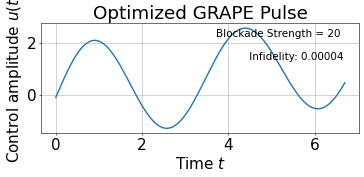

In [142]:
# --- Plot the optimized control pulse ---
t = np.linspace(0, T_total, N)

plt.figure(figsize=(8,4))
plt.plot(t, u_opt, lw=2)
plt.xlabel('Time $t$')
plt.ylabel('Control amplitude $u(t)$')
plt.title('Optimized GRAPE Pulse')
plt.grid(True)
plt.tight_layout()
plt.text(.95, 0.95, "Blockade Strength = 20 \n\n Infidelity: {:.5f}".format(infid_opt), transform=plt.gca().transAxes,
         fontsize=15, verticalalignment='top', horizontalalignment='right')
plt.show()


In [143]:
def compute_infidelity_from_phases(phases, times,
                                   Delta1, Delta2,
                                   Omega_Rabi1, Omega_Rabi2,
                                   Blockade, R_lifetime):
    """
    phases : array of length R (phase values phi_i at each slice)
    times  : array of length R+1 (time grid from 0 to pulse_time)
    returns: 1 - F_bell
    """
    # normalize parameters
    B = Blockade/Omega_Rabi1
    # initial states
    psi01 = np.array([1,0,0], complex)
    psi11 = np.array([1,0,0,0,0,0,0], complex)

    for i in range(len(phases)):
        dt    = times[i+1] - times[i]
        Omega1 = Omega_Rabi1 * np.exp(1j*phases[i])
        Omega2 = Omega_Rabi2 * np.exp(1j*phases[i])

        # one‐atom Hamiltonian H01
        H01 = 0.5 * np.array([
            [0,           Omega1,       Omega2],
            [np.conj(Omega1), Delta1,   0     ],
            [np.conj(Omega2), 0,        Delta2]
        ])

        # two‐atom Hamiltonian H11
        if B is None:
            H11 = np.sqrt(2)*H01
        else:
            H11 = 0.5*np.sqrt(2)*np.array([
                [0,            Omega1,        Omega2,       0,             0,             0,             0],
                [np.conj(Omega1), Delta1,     0,             Omega1,        Omega2,        0,             0],
                [np.conj(Omega2), 0,          Delta2,        0,             0,        Omega1,        Omega2],
                [0,             np.conj(Omega1), 0,          2*Delta1 + B,  0,             0,             0],
                [0,             np.conj(Omega2), 0,          0,             Delta1+Delta2+B, 0,          0],
                [0,             0,          np.conj(Omega1), 0,             0,           Delta1+Delta2+B, 0],
                [0,             0,          np.conj(Omega2), 0,             0,           0,           2*Delta2 + B]
            ])

        H01 = 0.5*(H01 + H01.conj().T)
        H11 = 0.5*(H11 + H11.conj().T)


        # propagate
        psi01 = scipy.linalg.expm(-1j * H01 * dt) @ psi01
        psi11 = scipy.linalg.expm(-1j * H11 * dt) @ psi11

    # remove global phase
    phase = psi01[0]/np.abs(psi01[0])
    psi01 /= phase
    psi11 /= phase**2

    # normalize
    psi01 /= np.linalg.norm(psi01)
    psi11 /= np.linalg.norm(psi11)

    # Bell fidelity
    F_bell = (1/16) * np.abs(1 + 2*psi01[0] - psi11[0])**2
    return 1 - F_bell

In [144]:
# --- Compute the infidelity of the GRAPE pulse ---
R = len(u_opt)                  # number of slices
times_grape = np.linspace(0, pulse_time, R+1)

infidelity_grape = compute_infidelity_from_phases(
    phases       = u_opt,
    times        = times_grape,
    Delta1       = Delta1,
    Delta2       = Delta2,
    Omega_Rabi1  = Omega_Rabi1,
    Omega_Rabi2  = Omega_Rabi2,
    Blockade     = Blockade,
    R_lifetime   = R_lifetime
)

print(f"CRAB‐style infidelity of GRAPE pulse: {infidelity_grape:.6}")

CRAB‐style infidelity of GRAPE pulse: 0.469974
